In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
years = range(1977, 2024)
data = pd.DataFrame({'Year':[], 'Rank':[], 'Movie':[], 'Worldewide':[]})

In [3]:
ind = 0
for year in years:
    url = "https://www.boxofficemojo.com/year/world/"+str(year)+"/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    table  = soup.find_all('table')[0]
    rows = table.find_all('tr')

    for row in rows[1:10]:
        cells = row.find_all('td')
        number = cells[0].text.strip()
        name = cells[1].text.strip()
        Worldewide = cells[2].text.strip()
        data.loc[int(ind), 'Year'] = int(year)
        data.loc[int(ind), 'Rank'] = number
        data.loc[int(ind), 'Movie'] = name
        data.loc[int(ind), 'Worldewide'] = Worldewide
        ind = ind +1

In [4]:
data.head(4)

,Year,Rank,Movie,Worldewide
0,1977.0,1,Star Wars: Episode IV - A New Hope,"$307,263,857"
1,1977.0,2,Smokey and the Bandit,"$126,748,082"
2,1977.0,3,Close Encounters of the Third Kind,"$116,395,662"
3,1977.0,4,Saturday Night Fever,"$94,213,184"


In [5]:
df= data
df = df[df['Year'] >= 1993]

In [6]:
df["Worldewide"] = df['Worldewide'].astype("string")
df["Movie"] = df['Movie'].astype("string")
df["Rank"] = df['Rank'].astype("int")
df["Year"] = df['Year'].astype("int")

In [7]:
df.dtypes

Year           int32
Rank           int32
Movie         string
Worldewide    string
dtype: object

In [8]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

for i, money in df['Worldewide'].items():
    mon = locale.atof(money.strip("$"))
    df.loc[int(i), 'Worldewide'] = str(round(mon))

In [9]:
df.dtypes

Year           int32
Rank           int32
Movie         string
Worldewide    string
dtype: object

In [10]:
df["Worldewide"] = df['Worldewide'].astype("float")

In [11]:
df = df.sort_values(by=['Worldewide'], ascending=False).set_index('Year')

In [13]:
df.head(4)

,Rank,Movie,Worldewide
Year,,,
2019,1,Avengers: Endgame,2.799439e+09
2009,1,Avatar,2.743578e+09
2022,1,Avatar: The Way of Water,2.320250e+09
2015,1,Star Wars: Episode VII - The Force Awakens,2.068224e+09


In [17]:
df2 = data[data['Year'] >= 1993]
df2 = df2.reset_index()
df2 = df2.drop(columns=['index'])

In [18]:
df2.head(4)

,Year,Rank,Movie,Worldewide
0,1993.0,1,Jurassic Park,"$978,167,947"
1,1993.0,2,Mrs. Doubtfire,"$219,195,446"
2,1993.0,3,The Fugitive,"$183,875,799"
3,1993.0,4,The Firm,"$158,348,367"


In [21]:
years = []
for year in df2['Year']:
    year = int(year)
    years.append(year)
    
df2['Year'] = years

In [22]:
links = []
for movie in df2['Movie']:
    url = 'https://www.rottentomatoes.com/search?search='+str(movie)
    response = requests.get(url)
    moviesoup = BeautifulSoup(response.text, 'html.parser')
    
    table = moviesoup.find_all('ul')[18]
    link = table.find_all('a')[0].get("href")
    links.append(link)
    
df2['Link'] = links

In [24]:
df2.head(4)

,Year,Rank,Movie,Worldewide,Link
0,1993,1,Jurassic Park,"$978,167,947",https://www.rottentomatoes.com/m/jurassic_park
1,1993,2,Mrs. Doubtfire,"$219,195,446",https://www.rottentomatoes.com/m/mrs_doubtfire
2,1993,3,The Fugitive,"$183,875,799",https://www.rottentomatoes.com/m/1046129-fugitive
3,1993,4,The Firm,"$158,348,367",https://www.rottentomatoes.com/m/1044522-firm


In [29]:
genres = []
for movie in df2['Movie']:
    ind = df2.index[df2['Movie'] == movie][0]
    url = df2['Link'].iloc[ind]
    
    response = requests.get(url)
    moviesoup = BeautifulSoup(response.text, 'html.parser')
    
    x = str(moviesoup).find('genre')
    if x == -1:
        genre_list = ''
    else:
        gens = str(moviesoup)[x+8:x+100].split(']')[0][:-1].split(',')
        genre_list = gens
    genres.append(genre_list)    

df2['Genre'] = genres

In [30]:
df2

,Year,Rank,Movie,Worldewide,Link,Genre
0,1993,1,Jurassic Park,"$978,167,947",https://www.rottentomatoes.com/m/jurassic_park,"[""Adventure"", ""Action"", ""Sci-Fi"", ""Mystery & T..."
1,1993,2,Mrs. Doubtfire,"$219,195,446",https://www.rottentomatoes.com/m/mrs_doubtfire,"[""Kids & Family"", ""Comedy]"
2,1993,3,The Fugitive,"$183,875,799",https://www.rottentomatoes.com/m/1046129-fugitive,"[""Action"", ""Mystery & Thriller]"
3,1993,4,The Firm,"$158,348,367",https://www.rottentomatoes.com/m/1044522-firm,"[""Drama"", ""Mystery & Thriller]"
4,1993,5,Sleepless in Seattle,"$126,680,884",https://www.rottentomatoes.com/m/sleepless_in_...,"[""Romance"", ""Comedy]"
...,...,...,...,...,...,...
274,2023,5,Fast X,"$704,875,015",https://www.rottentomatoes.com/m/fast_x,"[""Action"", ""Adventure]"
275,2023,6,Spider-Man: Across the Spider-Verse,"$690,615,475",https://www.rottentomatoes.com/m/spider_man_ac...,"[""Kids & Family"", ""Action"", ""Adventure"", ""Come..."
276,2023,7,Wonka,"$632,302,312",https://www.rottentomatoes.com/m/wonka,"[""Kids & Family"", ""Musical"", ""Comedy"", ""Fantasy]"
277,2023,8,The Little Mermaid,"$569,626,289",https://www.rottentomatoes.com/m/the_little_me...,"[""Kids & Family"", ""Musical"", ""Fantasy"", ""Romance]"


In [45]:
Gens = df2

In [46]:
gens = Gens['Genre']

In [50]:
genre_final_list = []
for gen in gens:
    for g in gen:
        genre_final_list.append(g)

In [55]:
last_list = []
for gen in genre_final_list:
    new = gen.replace('"','')
    last_list.append(new)

In [57]:
list(set(last_list))

856

In [74]:
dataframe = pd.DataFrame(last_list, columns=['Genre'])
Counts = dataframe['Genre'].value_counts().tolist()
Genre = dataframe['Genre'].unique().tolist()

In [75]:
final_data = pd.DataFrame()

In [76]:
final_data['Genre'] = Genre
final_data['Counts'] = Counts

In [77]:
final_data

,Genre,Counts
0,Adventure,186
1,Action,143
2,Sci-Fi,108
3,Mystery & Thriller,105
4,Kids & Family,66
5,Comedy,63
6,Drama,47
7,Romance,39
8,Crime,35
9,History,18


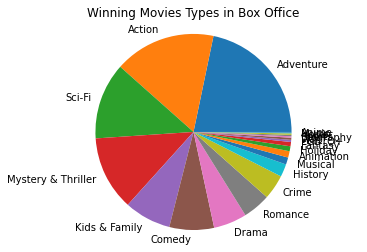

In [87]:
from matplotlib import pyplot as plt
plt.pie(final_data['Counts'], labels = final_data['Genre'])
plt.axis('equal')
plt.title('Winning Movies Types in Box Office')
plt.show()

In [112]:
after_editing = final_data[final_data['Counts']>9]
others = final_data[final_data['Counts']<=9]

In [113]:
new_row = {'Genre':'Others', 'Counts':others['Counts'].sum()}
after_editing = after_editing.append(new_row, ignore_index=True)

In [115]:
after_editing

,Genre,Counts
0,Adventure,186
1,Action,143
2,Sci-Fi,108
3,Mystery & Thriller,105
4,Kids & Family,66
5,Comedy,63
6,Drama,47
7,Romance,39
8,Crime,35
9,History,18


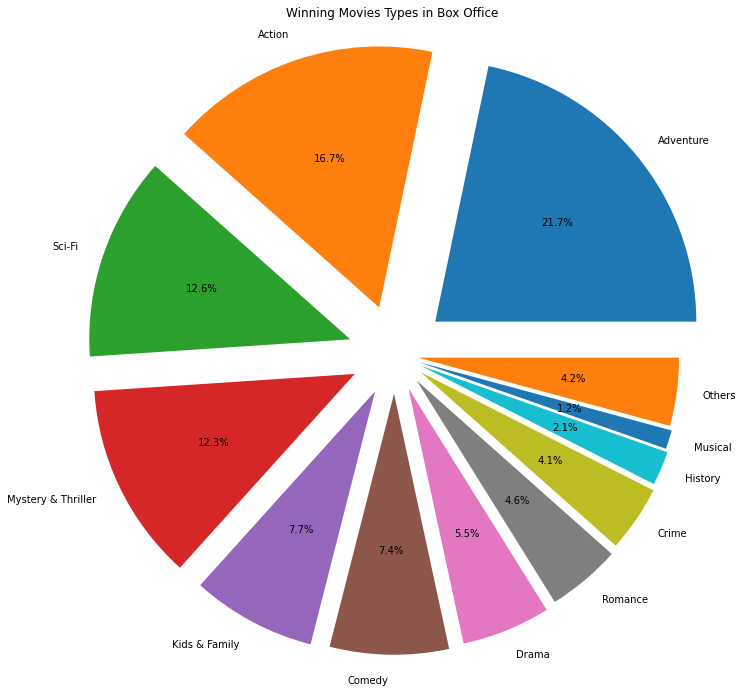

In [184]:
ex = [0.2]+[0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09]
plt.figure(figsize=(12, 12))
plt.pie(after_editing['Counts'], labels = after_editing['Genre'],
        autopct='%1.1f%%', shadow=False, startangle=0, explode=ex, frame= False)
plt.title('Winning Movies Types in Box Office')
plt.axis('equal')
plt.show()
